## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
data_complete

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Checking the number of mice.
mice_count = len(data_complete["Mouse ID"].unique())
mice_count 

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_complete[data_complete.duplicated(subset=[ 'Mouse ID' ,'Timepoint'])]['Mouse ID']


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

data_complete[data_complete['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data_complete = data_complete[data_complete['Mouse ID'] != 'g989'].copy()

In [ ]:
# Checking the number of mice in the clean DataFrame.
mice_counttwo = len(clean_data_complete["Mouse ID"].unique())
mice_counttwo

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

data_complete.describe()



,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [ ]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_regimen = clean_data_complete.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_regimen = clean_data_complete.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_regimen = clean_data_complete.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation_regimen = clean_data_complete.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_regimen = clean_data_complete.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summarydf = pd.DataFrame({"Mean Tumor Volume":mean_regimen,
                              "Median Tumor Volume":median_regimen,
                              "Tumor Volume Variance":variance_regimen,
                              "Tumor Volume Std. Dev.":standard_deviation_regimen ,
                              "Tumor Volume Std. Err.":sem_regimen})
summarydf
#agg ({'mean','median', 'var', 'std', 'sem'})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Using the aggregation method, produce the same summary statistics in a single line

regimenStats = data_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median', 'var', 'std', 'sem']})
regimenStats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

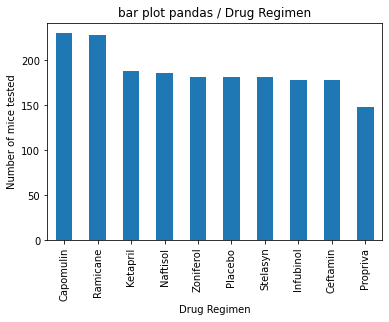

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
dg_count = clean_data_complete['Drug Regimen'].value_counts()
pandas_bar_plot = dg_count.plot(kind= 'bar')
plt.title("bar plot pandas / Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.show()



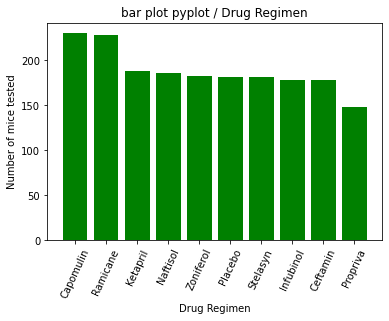

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(dg_count.index, dg_count.values, color ='green')
plt.title("bar plot pyplot / Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")
plt.xticks(rotation = 65)
plt.show()


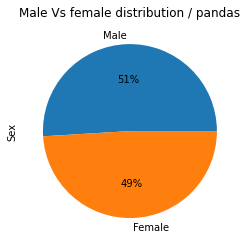

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_data_complete['Sex'].value_counts()
pandas_pie_plot = sex_count.plot(kind= 'pie', autopct='%1.0f%%')
plt.title("Male Vs female distribution / pandas")
plt.show()


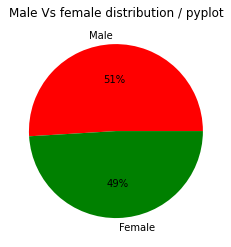

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie( sex_count.values,labels= sex_count.index, colors= ['red', 'green'], autopct='%1.0f%%')
plt.title("Male Vs female distribution / pyplot")

plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
finaltumor = data_complete.groupby('Mouse ID').agg({'Tumor Volume (mm3)':['mean','median', 'var', 'std', 'sem']})
finaltumor

Tumor Volume (mm3)                                          
                       mean     median        var       std       sem
Mouse ID                                                             
a203              56.312708  55.983272  50.407041  7.099792  2.245151
a251              55.237095  55.938620  51.740730  7.193103  2.274659
a262              58.611631  58.572588  84.759928  9.206515  2.911356
a275              52.770965  52.044750  36.322924  6.026850  1.905857
a366              54.639906  55.265582  38.415384  6.198015  2.342629
...                     ...        ...        ...       ...       ...
z435              46.942214  47.115980   3.464898  1.861424  1.074693
z578              38.411510  38.160380  17.969628  4.239060  1.340508
z581              53.979584  53.062175  29.827123  5.461421  1.727053
z795              54.880317  55.613879  53.416711  7.308674  2.311206
z969              60.194652  60.522215  94.626337  9.727607  3.076139

[249 rows x 5 columns]

In [ ]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= clean_data_complete.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint= max_timepoint.reset_index()
max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_dataframe = max_timepoint.merge(clean_data_complete , on = ['Mouse ID' , 'Timepoint'], how = 'left')
merge_dataframe

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels 
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

In [ ]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatments:
    tx_regimen = merge_dataframe.loc[merge_dataframe["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']

#append tumor data to new list 
    tumor_vol_data.append(tumor_vol)
    

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

#Print values 
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


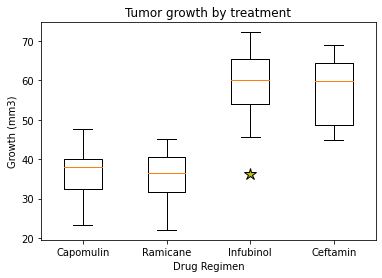

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()



## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Find the mouse treated with Capomulin 
# list of mice treated with Capomulin 
cap_mice = clean_data_complete.loc[clean_data_complete["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [ ]:
#Chose mice l509 
Mouse_b128 = clean_data_complete.loc[clean_data_complete["Mouse ID"] == "b128"]

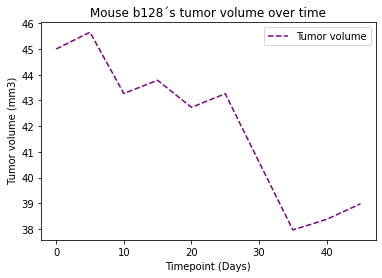

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Make variables to plot 
tumor_y = Mouse_b128["Tumor Volume (mm3)"]
time_x = Mouse_b128["Timepoint"]

# Plot our line that will be used to 
plt.plot(time_x, tumor_y, color="purple", label="Tumor volume", linestyle = "dashed")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse b128´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#All capomulin mice are in cap_mice ( used for the previous excercise)
#
cap_group =cap_mice.groupby(["Mouse ID"]).mean()
cap_group.head()

#Get average tumor volumen
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

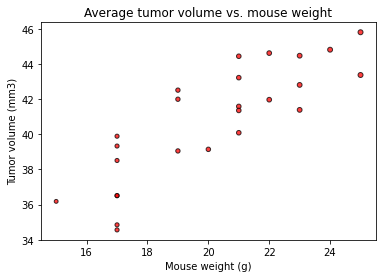

In [ ]:
#Create scatterplot 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="red", edgecolors="black",
            s=avg_tumor_vol, alpha=0.75)
#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

# Equations for correlation and regression
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

#Use the same scatterplot made before 
#Change colors 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="red", edgecolors="black",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

ModuleNotFoundError: No module named 'scipy'